<a href="https://colab.research.google.com/github/tesa0/ML_python/blob/main/04_2020_14_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотек.
# Рисовать графики сразу же
%matplotlib inline
# регулярные выражения
import re
# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
# Импортируем библиотеку обработки и анализа данных pandas
import pandas as pd
# Импортируем модуль pyplot библиотеки matplotlib для построения графиков/#Отрисовка изображений
import matplotlib.pyplot as plt
from PIL import Image
# Импортируем модуль datetime для обработки данных в формете даты
import datetime
# Импортируем библиотеку numpy
import numpy as np
# Импортируем библиотеку files для работы с файлами/#Для загрузки своей картинки
from google.colab import files
# Модуль для построения графиков
import pylab
# Модуль для трехмерной графики
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Загрузка базы mnist.
#Библиотека с базой Mnist
from tensorflow.keras.datasets import mnist
# Подлючаем класс создания модели Sequential
from tensorflow.keras.models import Sequential
# Подключаем класс Dense - полносвязный слой
from tensorflow.keras.layers import Dense
# Подключаем оптимизатор Adam
from tensorflow.keras.optimizers import Adam
#Утилиты для to_categorical
from tensorflow.keras import utils
#Для отрисовки изображения
from tensorflow.keras.preprocessing import image

In [ ]:
#Нормирование и преобразование x_train и y_train
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
x_train_org[0].shape

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)

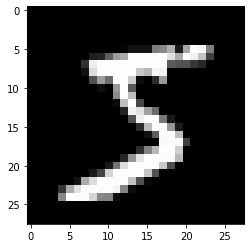

In [ ]:
plt.imshow(Image.fromarray(x_train_org[0]).convert('RGB')) 
plt.show()

In [ ]:
x_train = x_train_org.reshape(60000, 784) # меняем формат 60к картинок
x_test = x_test_org.reshape(10000, 784) # для проверки оставляем 10к штук
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
print(x_train.max())
print(x_test.max())

255
255


In [ ]:
x_train = x_train.astype('float32')
x_train /= 255 #
x_test = x_test.astype('float32')
x_test /= 255

In [ ]:
#Создание нейронной сети.
model = Sequential()
model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 709,110
Trainable params: 709,110
Non-trainable params: 0
_________________________________________________________________
None


# Новый раздел

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
#Обучение нейронной сети.
model.fit(x_train, y_train, batch_size=60000, epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 2.3663 - accuracy: 0.1031
Epoch 2/15
1/1 [==============================] - 0s 67ms/step - loss: 2.0318 - accuracy: 0.3839
Epoch 3/15
1/1 [==============================] - 0s 61ms/step - loss: 1.7668 - accuracy: 0.5802
Epoch 4/15
1/1 [==============================] - 0s 57ms/step - loss: 1.5000 - accuracy: 0.6612
Epoch 5/15
1/1 [==============================] - 0s 42ms/step - loss: 1.2513 - accuracy: 0.7327
Epoch 6/15
1/1 [==============================] - 0s 44ms/step - loss: 1.0361 - accuracy: 0.7909
Epoch 7/15
1/1 [==============================] - 0s 45ms/step - loss: 0.8632 - accuracy: 0.8185
Epoch 8/15
1/1 [==============================] - 0s 34ms/step - loss: 0.7315 - accuracy: 0.8301
Epoch 9/15
1/1 [==============================] - 0s 48ms/step - loss: 0.6293 - accuracy: 0.8402
Epoch 10/15
1/1 [==============================] - 0s 33ms/step - loss: 0.5533 - accuracy: 0.8489
Epoch 11/15
1/1 [=============

по результатам тестов лучший покаатель был при batch_size=60000, activation='relu', Dense = 100
точность = 0,9988

PRO 

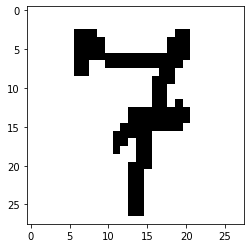

In [ ]:
img = image.load_img('7.png', target_size=(28, 28), color_mode = 'grayscale')  
x7 = image.img_to_array(img)
x7new = np.reshape(x7, (28,28))
y7 = 7
plt.imshow(Image.fromarray(x7new).convert('RGB'))
plt.show()

In [ ]:
x7new1 = np.reshape(x7new, (1,784))
print(x7new1.shape)

(1, 784)


In [ ]:
prediction = model.predict(x7new1)
prediction

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)

3
